## 1. Load Data  
Import libraries and load the dataset for Benin.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('../data/benin-malanville.csv', parse_dates=['Timestamp'])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


### 2. Summary Statistics

Use `df.describe()` to get a quick overview of all numeric columns, including mean, standard deviation, min, max, and quartiles.


In [2]:
print("Summary statistics:")
print(df.describe())




Summary statistics:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50% 

### 3. Missing Value Report

Identify missing values per column to determine data completeness.  
This helps to plan imputation or cleaning strategies.


In [3]:
print("Missing values per column:")
df.isna().sum()


Missing values per column:


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### 4. Columns with More Than 5% Null Values

Calculate the percentage of missing values in each column and flag columns where the null rate exceeds 5%.


In [4]:
null_percent = df.isna().mean() * 100
print("Columns with more than 5% null values:")
null_percent[null_percent > 5]


Columns with more than 5% null values:


Comments    100.0
dtype: float64

### 5. Compute Z-scores for Outlier Detection

Calculate Z-scores for the main sensor and irradiance columns to detect outliers.  
Any data point with an absolute Z-score greater than 3 is considered an outlier.


In [5]:
# Compute Z-scores for selected numeric columns directly
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']], nan_policy='omit'))

# Create a mask for rows that are outliers in any of these columns
outlier_mask = (z_scores > 3).any(axis=1)

print(f"Number of outlier rows detected: {outlier_mask.sum()}")

# Optionally preview a few of those rows
print(f"Preview a few of rows containing outliers")
df[outlier_mask].head()


Number of outlier rows detected: 7740
Preview a few of rows containing outliers


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
670,2021-08-09 11:11:00,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7,NaN
671,2021-08-09 11:12:00,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1,NaN
672,2021-08-09 11:13:00,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3,NaN
673,2021-08-09 11:14:00,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2,NaN
674,2021-08-09 11:15:00,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5,NaN


### 6. Handle Missing and Outlier Values

To clean the dataset:
- **Missing values** will be imputed using the **median** of each column.  
- **Outliers** (rows with |Z| > 3) will be removed to ensure reliable analysis.


In [6]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Drop outlier rows
df_clean = df[~outlier_mask].copy()

# Impute missing values with median
df_clean[key_columns] = df_clean[key_columns].fillna(df_clean[key_columns].median())

print(f"Cleaned dataset shape: {df_clean.shape}")


Cleaned dataset shape: (517860, 19)


### 7. Export Cleaned Dataset
Export the cleaned dataset for Benin to the `data/` directory.  


In [7]:
output_path = '../data/benin_clean.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset exported to: {output_path}")


Cleaned dataset exported to: ../data/benin_clean.csv


## 8. Time Series Analysis
Visualize how solar irradiance and temperature variables (GHI, DNI, DHI, Tamb) change over time.  
Also observe patterns across months and hours to identify peaks, drops, or anomalies.


<Figure size 1400x600 with 0 Axes>

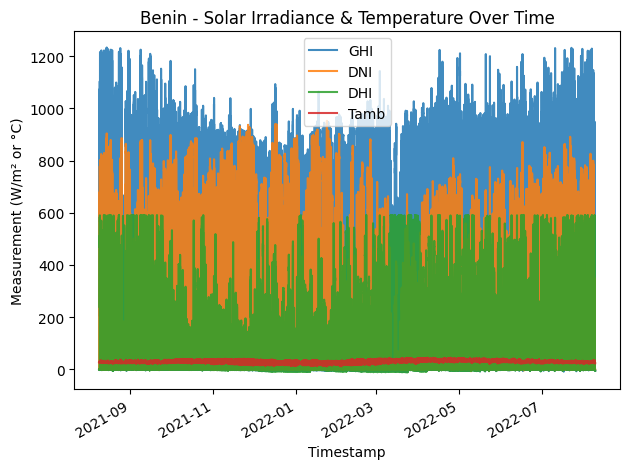

In [8]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb vs time
plt.figure(figsize=(14,6))
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(alpha=0.85)
plt.title("Benin - Solar Irradiance & Temperature Over Time")
plt.ylabel("Measurement (W/m² or °C)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()


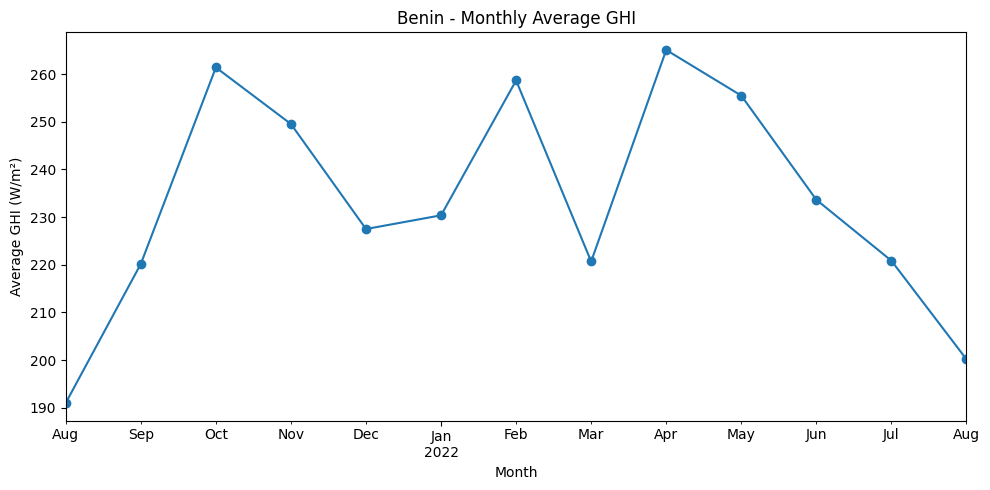

In [9]:
# Monthly average GHI
monthly_avg = df_clean.resample('ME').mean()

plt.figure(figsize=(10,5))
monthly_avg['GHI'].plot(marker='o', linestyle='-')
plt.title("Benin - Monthly Average GHI")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()


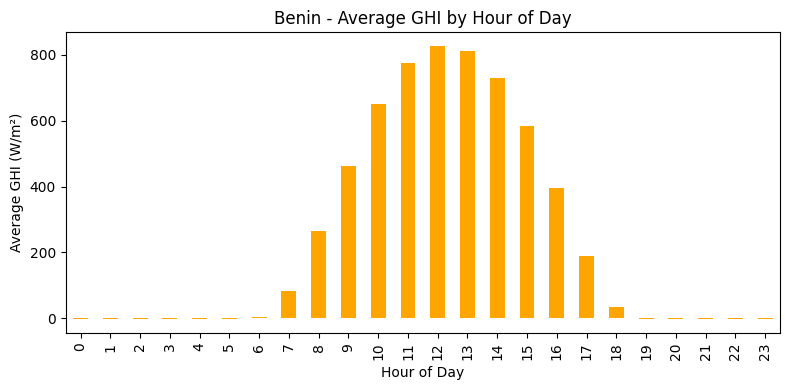

In [10]:
# Hourly pattern
df_clean['hour'] = df_clean.index.hour
hourly_avg = df_clean.groupby('hour')['GHI'].mean()

plt.figure(figsize=(8,4))
hourly_avg.plot(kind='bar', color='orange')
plt.title("Benin - Average GHI by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average GHI (W/m²)")
plt.tight_layout()
plt.show()


### 9. Cleaning Impact
Analyze how solar panel cleaning affects module readings (ModA & ModB).  
We compare average readings for cleaned vs uncleaned states.


Mean Module Readings by Cleaning Flag:
   Cleaning        ModA       ModB
0         0  232.323881  224.95509
1         1  306.610124  301.45000


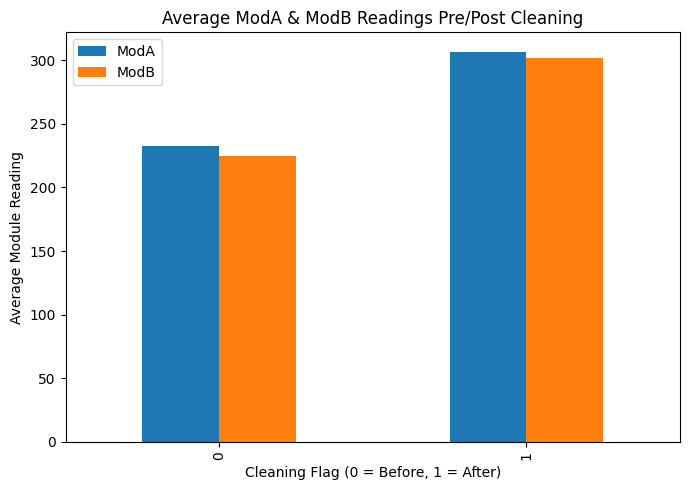

In [11]:
if 'Cleaning' in df_clean.columns:
    grouped = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
    print("Mean Module Readings by Cleaning Flag:")
    print(grouped)

    grouped.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar', figsize=(7,5))
    plt.title("Average ModA & ModB Readings Pre/Post Cleaning")
    plt.ylabel("Average Module Reading")
    plt.xlabel("Cleaning Flag (0 = Before, 1 = After)")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Cleaning' not found in dataset — skipping this step.")


### 10. Correlation & Relationship Analysis
Examine correlations between key solar parameters to identify which factors move together.  
A heatmap highlights strong positive or negative relationships.


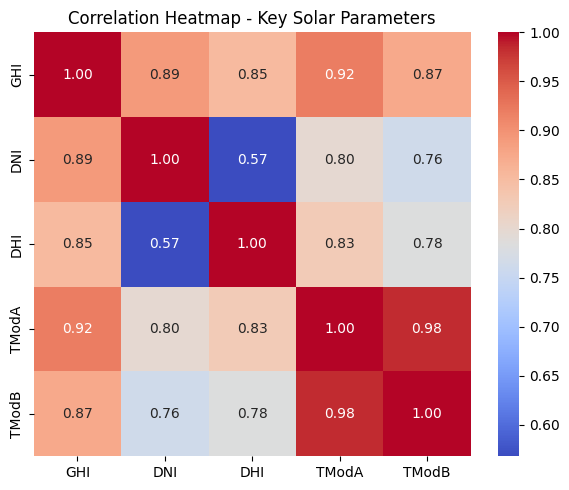

In [12]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(6,5))
sns.heatmap(df_clean[corr_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Key Solar Parameters")
plt.tight_layout()
plt.show()


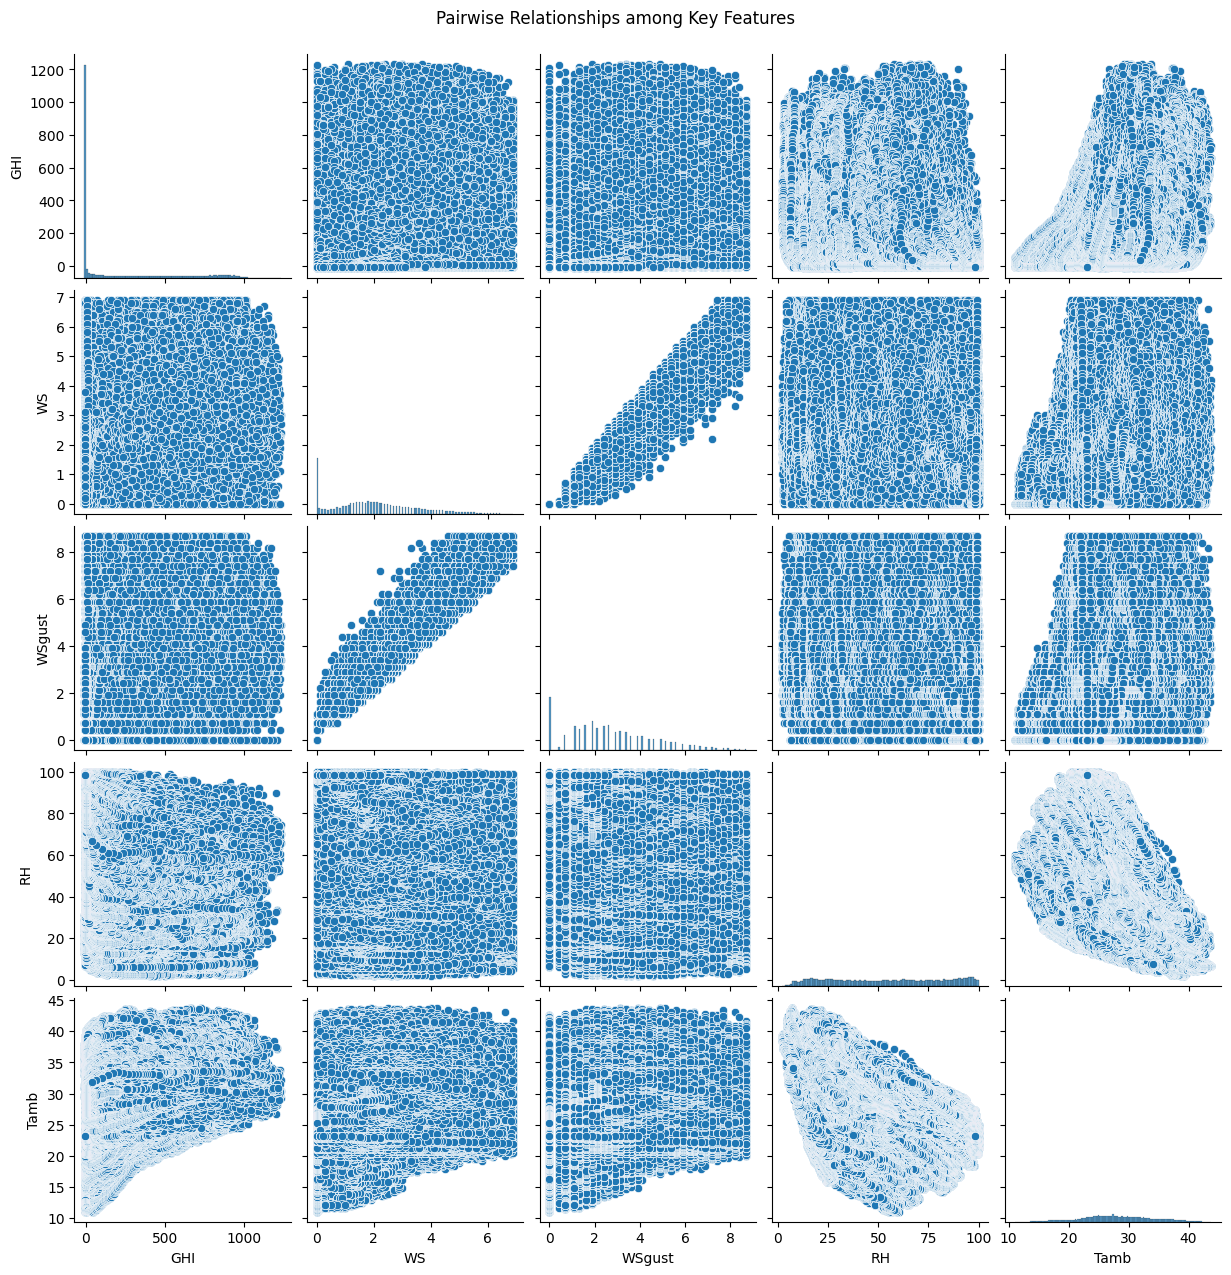

In [13]:
sns.pairplot(df_clean, vars=['GHI', 'WS', 'WSgust', 'RH', 'Tamb'], diag_kind='hist')
plt.suptitle("Pairwise Relationships among Key Features", y=1.02)
plt.show()


### 11. Wind & Distribution Analysis
Study wind behavior and irradiance distribution using histograms and wind direction patterns.


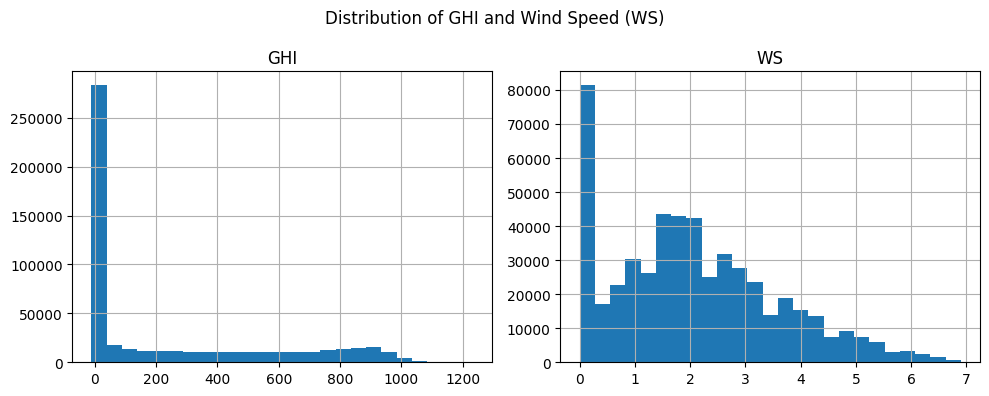

In [14]:
# Histograms for GHI and WS
df_clean[['GHI', 'WS']].hist(bins=25, figsize=(10,4))
plt.suptitle("Distribution of GHI and Wind Speed (WS)")
plt.tight_layout()
plt.show()


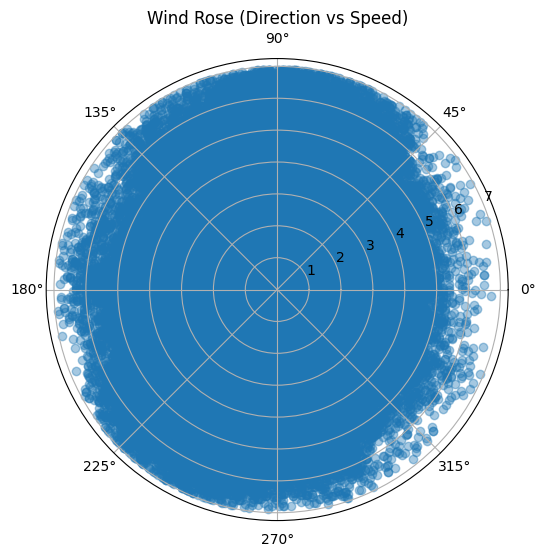

In [15]:
# Simple Wind Rose approximation (polar plot)
if 'WD' in df_clean.columns and 'WS' in df_clean.columns:
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    theta = np.deg2rad(df_clean['WD'])
    radii = df_clean['WS']
    ax.scatter(theta, radii, alpha=0.4)
    ax.set_title("Wind Rose (Direction vs Speed)")
    plt.show()


### 12. Temperature Analysis
Investigate how relative humidity (RH) influences temperature (Tamb) and solar irradiance (GHI).


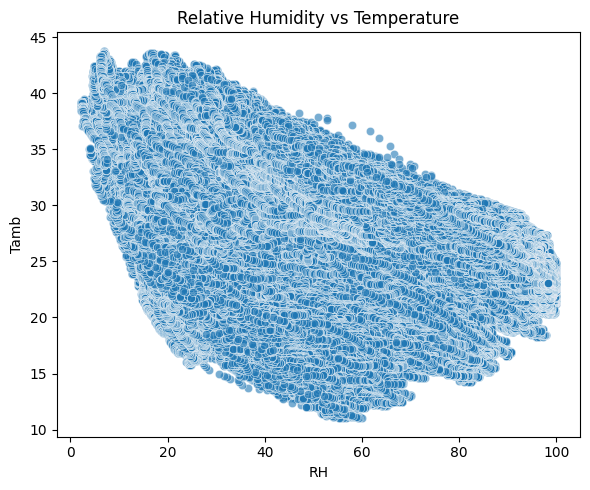

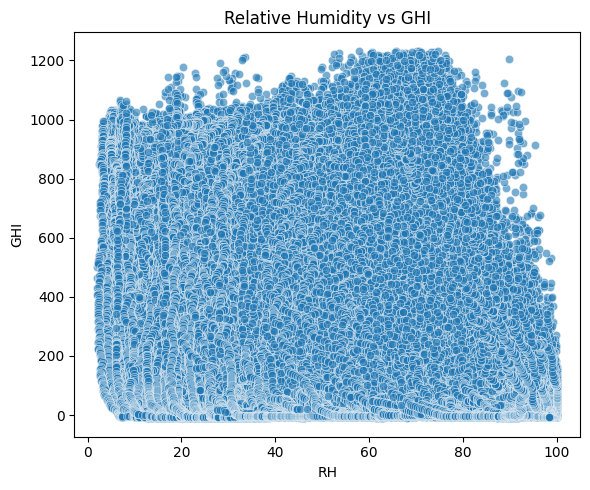

In [16]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.6)
plt.title("Relative Humidity vs Temperature")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.6)
plt.title("Relative Humidity vs GHI")
plt.tight_layout()
plt.show()


### 13. Bubble Chart
Create a bubble chart showing how temperature (Tamb) and humidity (RH) interact with solar radiation (GHI).  
Bubble size represents pressure (BP) or humidity (RH).


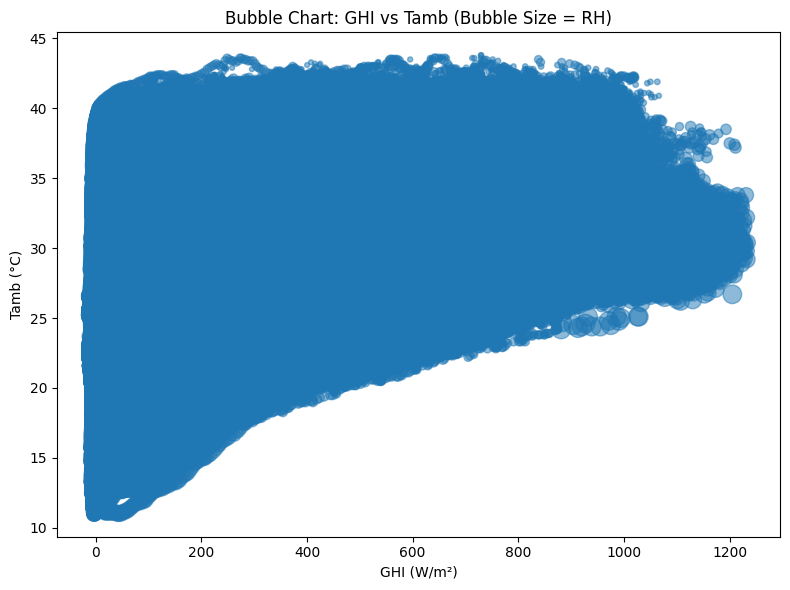

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH']*2, alpha=0.5)
plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Tamb (°C)")
plt.tight_layout()
plt.show()
